## Used Car Market EDM

In [1]:
import pandas as pd # Dataframe

import numpy as np # Analysis
import scipy.stats as st # Analysis

import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots
sns.set(style="white", palette='Blues',rc={"axes.facecolor": (0, 0, 0, 0)})

import geopandas as gpd # plot maps
from shapely.geometry import point, polygon

## Load Precleaned Data

Loading the data and remove the columns lat and long. The cleaning process can be viewed under CarSales_RoughClean.ipynb

In [2]:
sales_latlon = pd.read_csv('resources/data/CarSale_Data_Rough.csv') # df with latitude and longitude
sales = sales_latlon.drop(['lat', 'long'], axis=1)

A random sample of 4 rows from the data.

In [4]:
sales.sample(4)

,city,state,price,year,make,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color
7504,green bay,WI,21995,2012,chevrolet,silverado 1500,excellent,8 cylinders,gas,76583,clean,automatic,4wd,mid-size,truck,grey
651,tampa bay area,FL,1,2018,nissan,rogue,excellent,4 cylinders,gas,25675,clean,automatic,4wd,full-size,SUV,silver
2650,long island,NY,2000,2001,jeep,grand cherokee,good,6 cylinders,gas,189550,clean,automatic,4wd,mid-size,SUV,blue
6358,raleigh,NC,13995,2012,bmw,x5,excellent,6 cylinders,diesel,103589,clean,automatic,4wd,full-size,SUV,black


The number of rows and columns in the data set.

In [5]:
sales.shape

(10000, 16)

## EDM

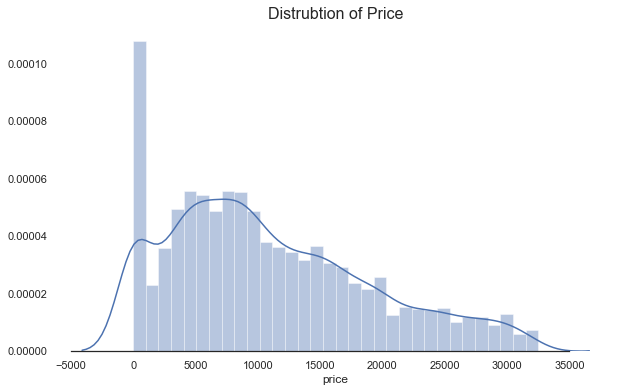

In [400]:
# Histogram of Prices
fig, ax = plt.subplots(1, figsize=(10,6));
sns.distplot(sales['price'], color='b')
ax.set_title('Distrubtion of Price', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

There appears to be a large influx of people listing their vehicle around the price of $0. This is most likely due to the advertising benifits of appear first when a potential customer lists the vehicles by ascending price. 

False price and milage will be filtered out in the future.

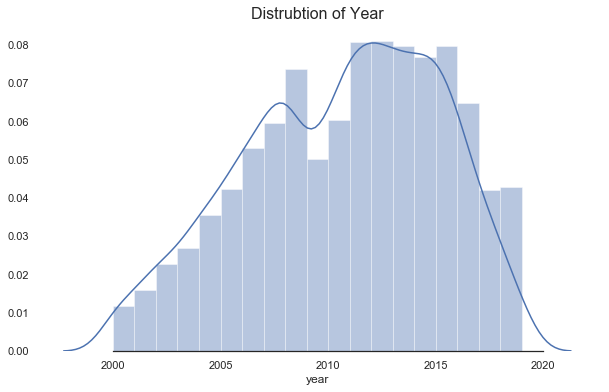

In [426]:
# Histogram of Years
fig, ax = plt.subplots(1, figsize=(10,6));
sns.distplot(sales['year'], color='b', bins = 2019-2000)
ax.set_title('Distrubtion of Year', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

It appears most people sell their car after 5 to 8 years of use. Note that the dip in avavilabe cars for sale from 2009 and 2010, this is most likely due to the market crash at the time.

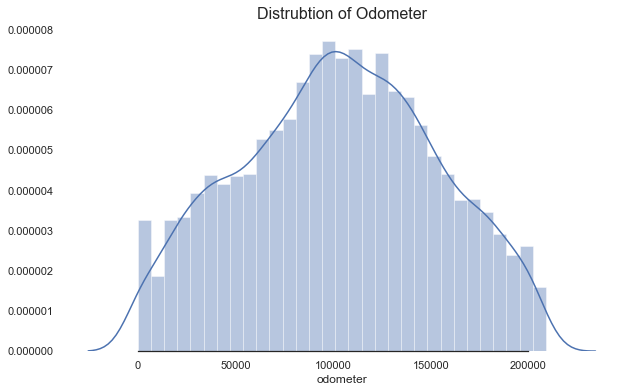

In [423]:
# Histogram of Odometer 
fig, ax = plt.subplots(1, figsize=(10,6));
sns.distplot(sales['odometer'], color='b')
ax.set_title('Distrubtion of Odometer', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

It appears that most cars are sold around when they hit 100k miles. Also note that like price more people report their car to have around 0 for increased views.

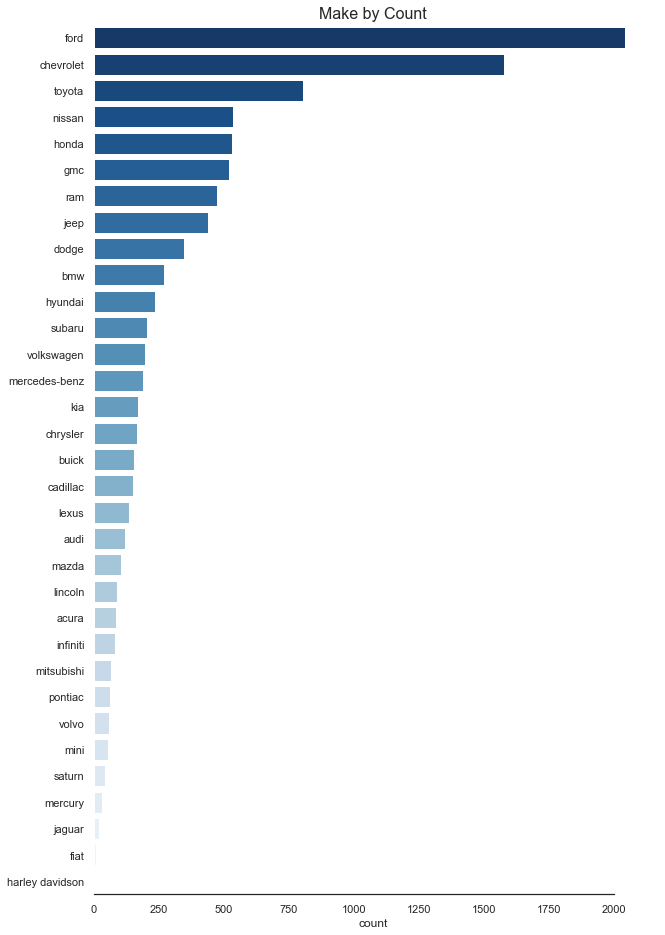

In [401]:
# Count of Vehicles by Make
fig, ax = plt.subplots(1, figsize=(10,16));
sns.countplot(y='make', data=sales, palette='Blues_r', order=sales['make'].value_counts().index)
ax.set_title('Make by Count', fontdict={'fontsize':'16', 'fontweight':'1'})
ax.xaxis.grid=True
ax.set(ylabel="")
sns.despine(trim=True, left=True)

It appears that ford and chevrolet dominate the used car market. Perhaps, American made cars are more sought after than foreign cars.

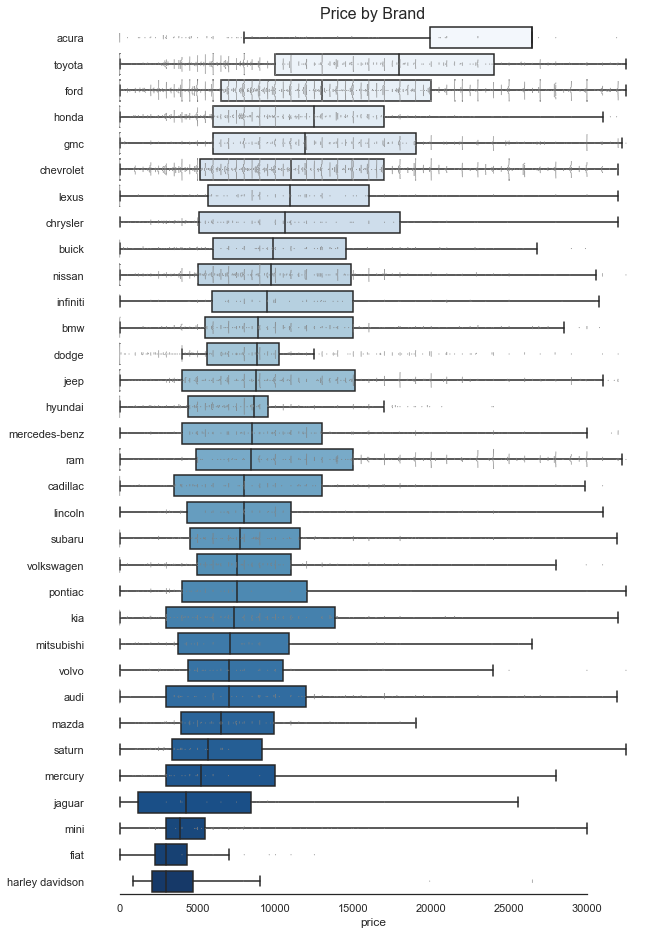

In [420]:
# Price by Make Distribution
makeOrder = sales[['make', 'price']].groupby('make').median().sort_values(by=['price'], ascending=False).index.tolist()
# plot
fig, ax = plt.subplots(1, figsize=(10,16));
sns.boxplot(y='make', x='price', data=sales, whis='range', palette = 'Blues', order=makeOrder)
sns.swarmplot(y='make', x='price', data=sales, size=1, color='.5', linewidth=0)
ax.xaxis.grid=True
ax.set(ylabel="")
ax.set_title('Price by Brand', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

From the swarm data you can notice that people perfer to price their car at a rounded number.

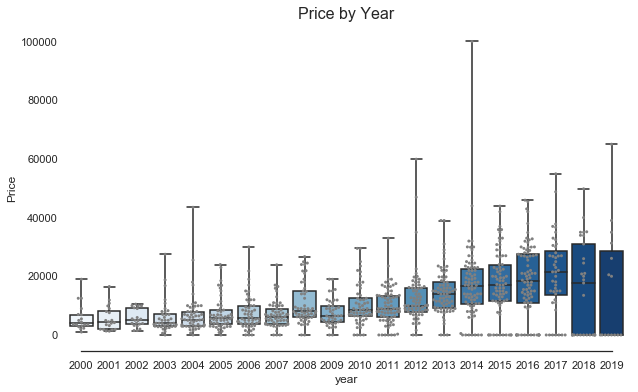

In [405]:
# Price by Year Distribution
fig, ax = plt.subplots(1, figsize=(10,6));
sns.boxplot(x='year', y='price', data=sales_1990, whis='range', palette = 'Blues')
sns.swarmplot(x='year', y='price', data=sales_1990, size=3, color='.5', linewidth=0)
ax.xaxis.grid=True
ax.set(ylabel="Price")
ax.set_title('Price by Year', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

As expected younger vehicles are valued more than older ones. Notice that the distributions for 2018 and 2019 are lower than previous years. This is most likely due to dealerships advertising a monthly plan instead of the upfront cost.

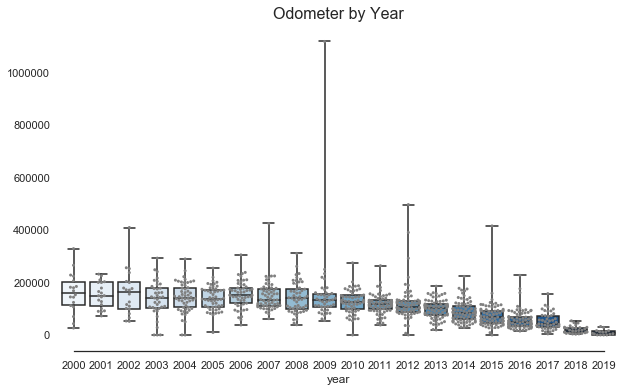

In [406]:
# Odomoter By Year Distribution
fig, ax = plt.subplots(1, figsize=(10,6));
sns.boxplot(x='year', y='odometer', data=sales_1990, whis='range', palette = 'Blues')
sns.swarmplot(x='year', y='odometer', data=sales_1990, size=3, color='.5', linewidth=0)
ax.xaxis.grid=True
ax.set(ylabel="")
ax.set_title('Odometer by Year', fontdict={'fontsize':'16', 'fontweight':'1'})
sns.despine(trim=True, left=True)

As expected there is a negative trend for vehicle's odometer as the years increase. It is notable that vehicles appear to be put onto the market before reaching 200k miles. There also appears to be a very strong outlier(s) on the 2009 cars.

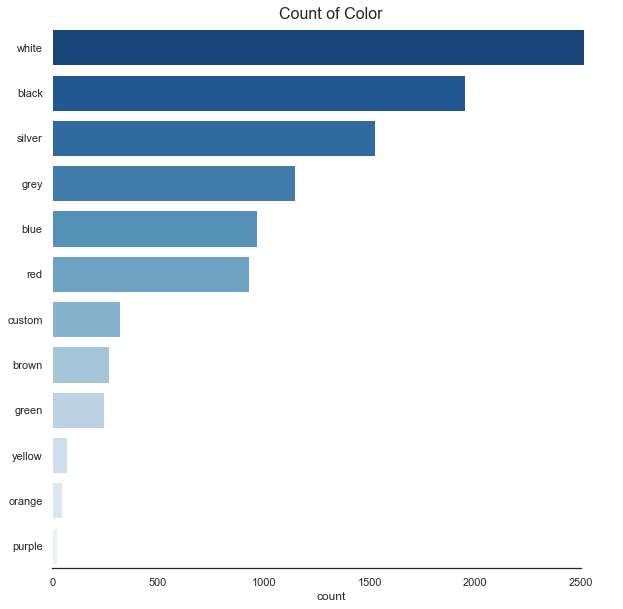

In [421]:
# Count of Vehicles by Color
fig, ax = plt.subplots(1, figsize=(10,10));
sns.countplot(y='color', data=sales, palette='Blues_r', order=sales['color'].value_counts().index)
ax.set_title('Count of Color', fontdict={'fontsize':'16', 'fontweight':'1'})
ax.xaxis.grid=True
ax.set(ylabel="")
sns.despine(trim=True, left=True)

It appears that white, black, silver, grey, blue, and red are the most popular colors. Nothing unexpected from this data.

In [408]:
# Load the map data
usa_df = gpd.read_file('resources/map/states.shp')
usa_df = usa_df[(usa_df['STATE_NAME'] != 'Hawaii') & (usa_df['STATE_NAME'] != 'Alaska')] # Drop Alaska, Hawaii

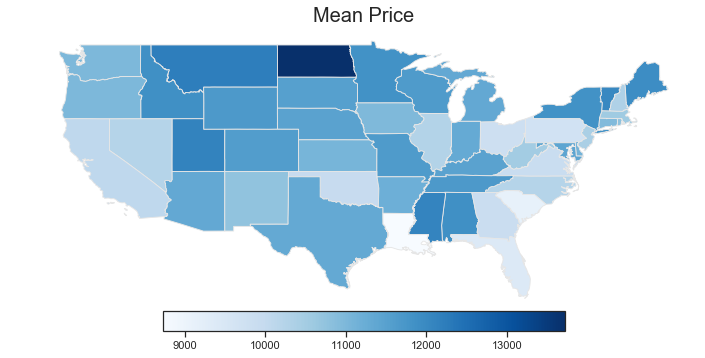

In [427]:
# Mean Price by State

# HeatMap
statePriceMean = sales[['state','price']].groupby('state').mean().reset_index()
merged_statePriceMean = usa_df.set_index('STATE_ABBR').join(statePriceMean.set_index('state'))

# Plot
fig, ax = plt.subplots(1, figsize=(12,10))
merged_statePriceMean.plot(column='price', cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Mean Price by State', fontdict={'fontsize':'20', 'fontweight':'3'})

# Legend
vmin = statePriceMean.price.quantile(.1)
vmax = statePriceMean.price.quantile(.9)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A =[]
cbar = fig.colorbar(sm, orientation='horizontal', shrink=.6, pad=0)

Prices seem to be evenly distributed across the nation with the southeast being the chepest region. This could be potential due to rust depreciating the value of the car.

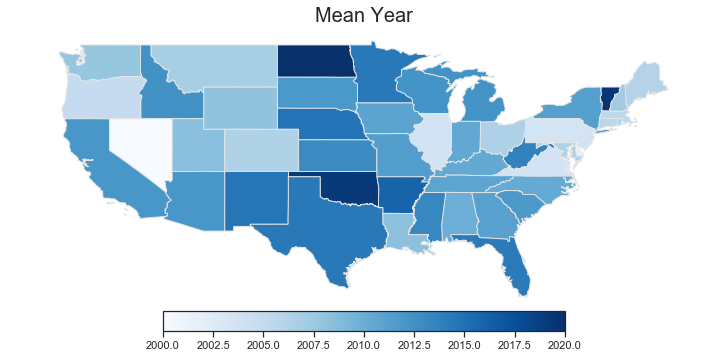

In [428]:
# Mean Year by state

# Heatmap
stateYearMean = sales[['state','year']].groupby('state').mean().reset_index()
merged_stateYearMean = usa_df.set_index('STATE_ABBR').join(stateYearMean.set_index('state'))

# Plot
fig, ax = plt.subplots(1, figsize=(12,10))
merged_stateYearMean.plot(column='year', cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Mean Year', fontdict={'fontsize':'20', 'fontweight':'3'})

# Legend
vmin = 2000
vmax = 2020
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A =[]
cbar = fig.colorbar(sm, orientation='horizontal', shrink=.6, pad=0)

Nevada appears to hold onto their cars the longest with North Dakota, Vermont, and Oklahoma selling their car within the year. This could perhaps be due to dealerships advertising on cragslist in those states.

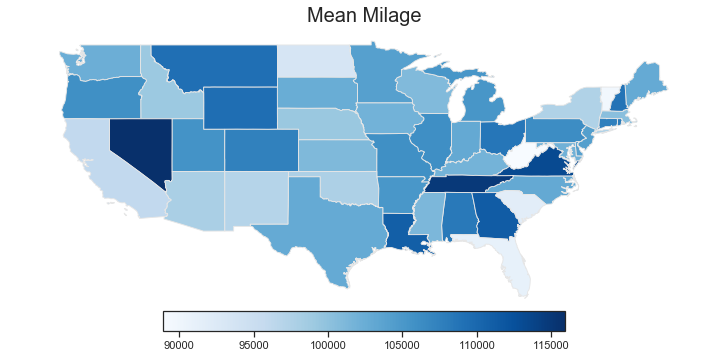

In [429]:
# Mean Milage by State

# Heatmap
stateOdometerMean = sales[['state', 'odometer']].groupby('state').mean().reset_index()
merged_stateOdometerMean = usa_df.set_index('STATE_ABBR').join(stateOdometerMean.set_index('state'))

# Plot
fig, ax = plt.subplots(1, figsize=(12,10))
merged_stateOdometerMean.plot(column='odometer', cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Mean Milage', fontdict={'fontsize':'20', 'fontweight':'3'})

# Legend
vmin = stateOdometerMean.odometer.quantile(.1)
vmax = stateOdometerMean.odometer.quantile(.9)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A =[]
cbar = fig.colorbar(sm, orientation='horizontal', shrink=.6, pad=0)

Unsurprisingly, Nervada also has the heightest milage on their cars.